# HW2 Policy Gradients 

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # 0 is default GPU. -1 is do not use GPU

In [2]:
import tensorflow as tf

print(tf.__version__)

c:\works\venv\vhw2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\works\venv\vhw2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\works\venv\vhw2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\works\venv\vhw2\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' 

1.14.0


c:\works\venv\vhw2\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\works\venv\vhw2\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\works\venv\vhw2\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\works\venv\vhw2\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: P

In [3]:
import train_pg_f18 as pg

import sys, os
import datetime as dt


## Problem 4 CartPole

In [4]:
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
# path=os.environ['PATH']
# %env PATH='/usr/local/bin:'+path

command_list = [
    'python train_pg_f18.py CartPole-v0 -n 100 -b 1000 -e 3 -dna --exp_name   sb_no_rtg_dna',
    'python train_pg_f18.py CartPole-v0 -n 100 -b 1000 -e 3 -rtg -dna --exp_name   sb_rtg_dna',
    'python train_pg_f18.py CartPole-v0 -n 100 -b 1000 -e 3 -rtg --exp_name   sb_rtg_na',
    'python train_pg_f18.py CartPole-v0 -n 100 -b 5000 -e 3 -dna --exp_name   lb_no_rtg_dna',
    'python train_pg_f18.py CartPole-v0 -n 100 -b 5000 -e 3 -rtg -dna --exp_name   lb_rtg_dna',
    'python train_pg_f18.py CartPole-v0 -n 100 -b 5000 -e 3 -rtg --exp_name   lb_rtg_na',
    'python train_pg_f18.py CartPole-v0 -n 100 -b 1000 -e 3 --exp_name   sb_no_rtg_na',
    'python train_pg_f18.py CartPole-v0 -n 100 -b 5000 -e 3 --exp_name   lb_no_rtg_na',
]

for command in command_list :
    sys.argv = command.split()[1:]
    print('starts train ', sys.argv, ' at', dt.datetime.now())
    pg.main()
    print('finished train ', sys.argv, ' at', dt.datetime.now())

print('finished train on all command list at', dt.datetime.now())

starts train  ['train_pg_f18.py', 'CartPole-v0', '-n', '100', '-b', '1000', '-e', '3', '-dna', '--exp_name', 'sb_no_rtg_dna']  at 2019-09-01 18:29:34.509671
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_pg_f18.py', 'CartPole-v0', '-n', '100', '-b', '1000', '-e', '3', '-dna', '--exp_name', 'sb_no_rtg_dna']  at 2019-09-01 18:30:02.638711
starts train  ['train_pg_f18.py', 'CartPole-v0', '-n', '100', '-b', '1000', '-e', '3', '-rtg', '-dna', '--exp_name', 'sb_rtg_dna']  at 2019-09-01 18:30:02.638711
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_pg_f18.py', 'CartPole-v0', '-n', '100', '-b', '1000', '-e', '3', '-rtg', '-dna', '--exp_name', 'sb_rtg_dna']  at 2019-09-01 18:30:54.041208
starts train  ['train_pg_f18.py', 'CartPole-v0', '-n', '100', '-b', '1000', '-e', '3', '-rtg', '--exp_name', 'sb_rtg_na']  at 2019-09-01 18:30:54.041208
Running experim

In [5]:
data_dir = os.path.join('.', 'data')

lb_path_list = [] # large batch files
sb_path_list = [] # small batch files

if os.path.isdir(data_dir) :
    for f in os.listdir(data_dir) :
        if f.startswith('lb_') :
            lb_path_list.append('data/' + f)
        elif f.startswith('sb_') :
            sb_path_list.append('data/' + f)

print(lb_path_list)
print(sb_path_list)

['data/lb_no_rtg_dna_CartPole-v0_01-09-2019_18-25-09', 'data/lb_no_rtg_dna_CartPole-v0_01-09-2019_18-31-46', 'data/lb_no_rtg_na_CartPole-v0_01-09-2019_18-44-07', 'data/lb_rtg_dna_CartPole-v0_01-09-2019_18-34-06', 'data/lb_rtg_na_CartPole-v0_01-09-2019_18-38-49']
['data/sb_no_rtg_dna_CartPole-v0_01-09-2019_18-24-19', 'data/sb_no_rtg_dna_CartPole-v0_01-09-2019_18-27-13', 'data/sb_no_rtg_dna_CartPole-v0_01-09-2019_18-29-34', 'data/sb_no_rtg_na_CartPole-v0_01-09-2019_18-43-32', 'data/sb_rtg_dna_CartPole-v0_01-09-2019_18-24-36', 'data/sb_rtg_dna_CartPole-v0_01-09-2019_18-27-31', 'data/sb_rtg_dna_CartPole-v0_01-09-2019_18-30-02', 'data/sb_rtg_na_CartPole-v0_01-09-2019_18-24-54', 'data/sb_rtg_na_CartPole-v0_01-09-2019_18-30-54']


starts plot  ['plot.py', 'data/sb_no_rtg_dna_CartPole-v0_01-09-2019_18-24-19', '--value', 'AverageReturn']  at 2019-09-01 18:46:16.539589
error -  No columns to parse from file
finished plot  ['plot.py', 'data/sb_no_rtg_dna_CartPole-v0_01-09-2019_18-24-19', '--value', 'AverageReturn']  at 2019-09-01 18:46:16.547567
starts plot  ['plot.py', 'data/sb_no_rtg_dna_CartPole-v0_01-09-2019_18-27-13', '--value', 'AverageReturn']  at 2019-09-01 18:46:16.547567
error -  No columns to parse from file
finished plot  ['plot.py', 'data/sb_no_rtg_dna_CartPole-v0_01-09-2019_18-27-13', '--value', 'AverageReturn']  at 2019-09-01 18:46:16.549562
starts plot  ['plot.py', 'data/sb_no_rtg_dna_CartPole-v0_01-09-2019_18-29-34', '--value', 'AverageReturn']  at 2019-09-01 18:46:16.550560


C:\Exception\Works\GitHub\cs294\yoonforh\hw2\plot.py:71: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  experiment_data = pd.read_table(log_path)
c:\works\venv\vhw2\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
c:\works\venv\vhw2\lib\site-packages\matplotlib\legend.py:1196: MatplotlibDeprecationWarning: 
Legend.draggable() is drepecated in favor of Legend.set_draggable(). Legend.draggable may be reintroduced as a property in future releases.
  message="Legend.draggable() is drepecated in "


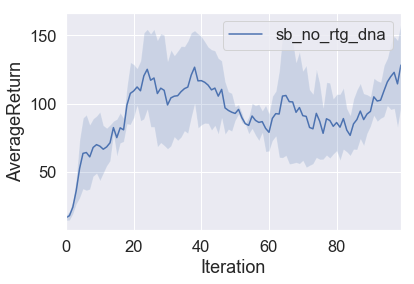

finished plot  ['plot.py', 'data/sb_no_rtg_dna_CartPole-v0_01-09-2019_18-29-34', '--value', 'AverageReturn']  at 2019-09-01 18:46:16.831808
starts plot  ['plot.py', 'data/sb_no_rtg_na_CartPole-v0_01-09-2019_18-43-32', '--value', 'AverageReturn']  at 2019-09-01 18:46:16.831808


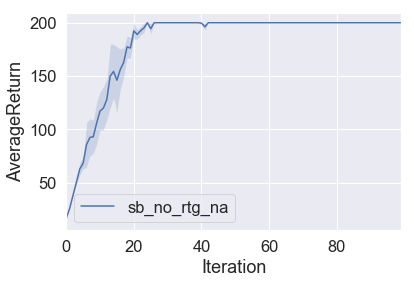

finished plot  ['plot.py', 'data/sb_no_rtg_na_CartPole-v0_01-09-2019_18-43-32', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.107072
starts plot  ['plot.py', 'data/sb_rtg_dna_CartPole-v0_01-09-2019_18-24-36', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.107072
error -  No columns to parse from file
finished plot  ['plot.py', 'data/sb_rtg_dna_CartPole-v0_01-09-2019_18-24-36', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.110063
starts plot  ['plot.py', 'data/sb_rtg_dna_CartPole-v0_01-09-2019_18-27-31', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.110063
error -  No columns to parse from file
finished plot  ['plot.py', 'data/sb_rtg_dna_CartPole-v0_01-09-2019_18-27-31', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.112058
starts plot  ['plot.py', 'data/sb_rtg_dna_CartPole-v0_01-09-2019_18-30-02', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.112058


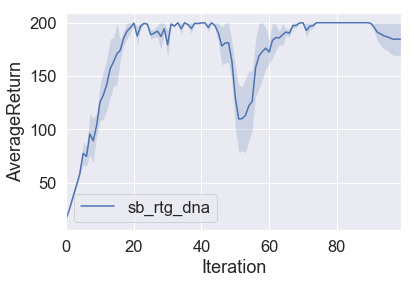

finished plot  ['plot.py', 'data/sb_rtg_dna_CartPole-v0_01-09-2019_18-30-02', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.368377
starts plot  ['plot.py', 'data/sb_rtg_na_CartPole-v0_01-09-2019_18-24-54', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.368377
error -  No columns to parse from file
finished plot  ['plot.py', 'data/sb_rtg_na_CartPole-v0_01-09-2019_18-24-54', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.370369
starts plot  ['plot.py', 'data/sb_rtg_na_CartPole-v0_01-09-2019_18-30-54', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.370369


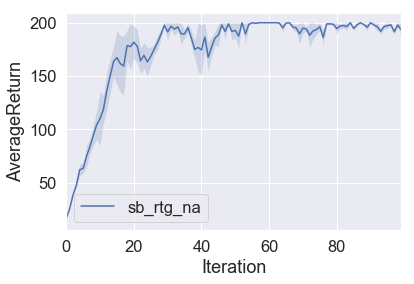

finished plot  ['plot.py', 'data/sb_rtg_na_CartPole-v0_01-09-2019_18-30-54', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.623692
starts plot  ['plot.py', 'data/lb_no_rtg_dna_CartPole-v0_01-09-2019_18-25-09', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.623692
error -  No columns to parse from file
finished plot  ['plot.py', 'data/lb_no_rtg_dna_CartPole-v0_01-09-2019_18-25-09', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.626682
starts plot  ['plot.py', 'data/lb_no_rtg_dna_CartPole-v0_01-09-2019_18-31-46', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.626682


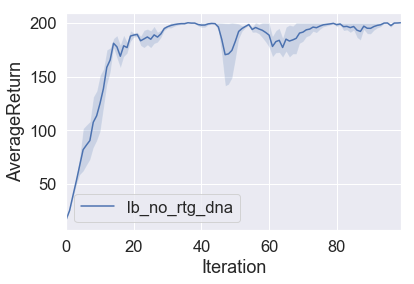

finished plot  ['plot.py', 'data/lb_no_rtg_dna_CartPole-v0_01-09-2019_18-31-46', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.899953
starts plot  ['plot.py', 'data/lb_no_rtg_na_CartPole-v0_01-09-2019_18-44-07', '--value', 'AverageReturn']  at 2019-09-01 18:46:17.899953


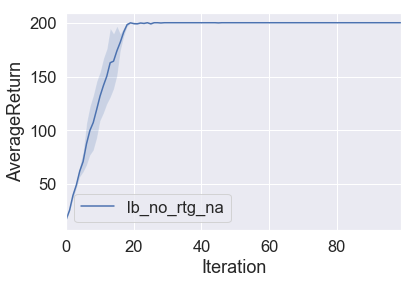

finished plot  ['plot.py', 'data/lb_no_rtg_na_CartPole-v0_01-09-2019_18-44-07', '--value', 'AverageReturn']  at 2019-09-01 18:46:18.149287
starts plot  ['plot.py', 'data/lb_rtg_dna_CartPole-v0_01-09-2019_18-34-06', '--value', 'AverageReturn']  at 2019-09-01 18:46:18.150284


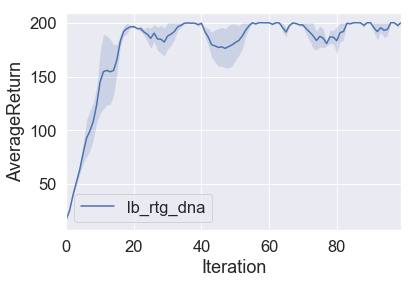

finished plot  ['plot.py', 'data/lb_rtg_dna_CartPole-v0_01-09-2019_18-34-06', '--value', 'AverageReturn']  at 2019-09-01 18:46:18.451481
starts plot  ['plot.py', 'data/lb_rtg_na_CartPole-v0_01-09-2019_18-38-49', '--value', 'AverageReturn']  at 2019-09-01 18:46:18.452475


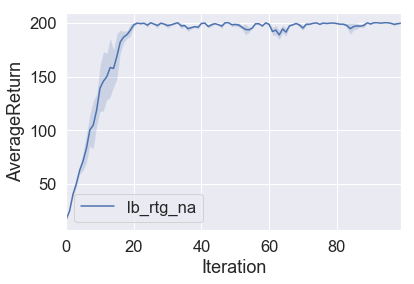

finished plot  ['plot.py', 'data/lb_rtg_na_CartPole-v0_01-09-2019_18-38-49', '--value', 'AverageReturn']  at 2019-09-01 18:46:18.729734
finished plot on all command list at 2019-09-01 18:46:18.729734


In [6]:
import plot
%matplotlib inline

for sb_path in sb_path_list :
    sys.argv = [ 'plot.py', sb_path, '--value', 'AverageReturn' ]
    print('starts plot ', sys.argv, ' at', dt.datetime.now())
    try :
        plot.main()
    except ValueError as e :
        print('error - ', e)
    print('finished plot ', sys.argv, ' at', dt.datetime.now())

for lb_path in lb_path_list :
    sys.argv = [ 'plot.py', lb_path, '--value', 'AverageReturn' ]
    print('starts plot ', sys.argv, ' at', dt.datetime.now())
    try :
        plot.main()
    except ValueError as e :
        print('error - ', e)
    print('finished plot ', sys.argv, ' at', dt.datetime.now())
    
print('finished plot on all command list at', dt.datetime.now())

## Problem 5 InvertedPendulum

In [7]:
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
# path=os.environ['PATH']
# %env PATH='/usr/local/bin:'+path

# PROBLEM 5

command = 'python train_pg_f18.py InvertedPendulum-v2 -ep 1000 --discount 0.9 -n 100 -e 3 -l 2 -s 64 -b {0} -lr {1} -rtg --exp_name ip_b{0}_r{1}'
command_list = []

for b in range(1500, 3001, 500) :
    lr = 0.005
    decay = 0.0005
    for n in range(5) :
        command_list.append(command.format(b, round(lr, 4)))
        lr -= decay

#for cmd in command_list :
#    print(cmd)


In [8]:

for command in command_list :
    sys.argv = command.split()[1:]
    print('starts train ', sys.argv, ' at', dt.datetime.now())
    pg.main()
    print('finished train ', sys.argv, ' at', dt.datetime.now())

print('finished train on all command list at', dt.datetime.now())

starts train  ['train_pg_f18.py', 'InvertedPendulum-v2', '-ep', '1000', '--discount', '0.9', '-n', '100', '-e', '3', '-l', '2', '-s', '64', '-b', '1500', '-lr', '0.005', '-rtg', '--exp_name', 'ip_b1500_r0.005']  at 2019-09-01 18:46:18.756662
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_pg_f18.py', 'InvertedPendulum-v2', '-ep', '1000', '--discount', '0.9', '-n', '100', '-e', '3', '-l', '2', '-s', '64', '-b', '1500', '-lr', '0.005', '-rtg', '--exp_name', 'ip_b1500_r0.005']  at 2019-09-01 18:50:16.581900
starts train  ['train_pg_f18.py', 'InvertedPendulum-v2', '-ep', '1000', '--discount', '0.9', '-n', '100', '-e', '3', '-l', '2', '-s', '64', '-b', '1500', '-lr', '0.0045', '-rtg', '--exp_name', 'ip_b1500_r0.0045']  at 2019-09-01 18:50:16.582896
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_pg_f18.py', 'InvertedPendulum-v2', '-ep', '1000', '--dis

In [9]:
data_dir = os.path.join('.', 'data')

ip_path_list = [] 

if os.path.isdir(data_dir) :
    for f in os.listdir(data_dir) :
        if f.startswith('ip_') :
            ip_path_list.append('data/' + f)

print(ip_path_list)


['data/ip_b1500_r0.0035_InvertedPendulum-v2_01-09-2019_18-57-23', 'data/ip_b1500_r0.003_InvertedPendulum-v2_01-09-2019_19-00-32', 'data/ip_b1500_r0.0045_InvertedPendulum-v2_01-09-2019_18-50-16', 'data/ip_b1500_r0.004_InvertedPendulum-v2_01-09-2019_18-54-02', 'data/ip_b1500_r0.005_InvertedPendulum-v2_01-09-2019_18-46-18', 'data/ip_b2000_r0.0035_InvertedPendulum-v2_01-09-2019_19-19-18', 'data/ip_b2000_r0.003_InvertedPendulum-v2_01-09-2019_19-23-53', 'data/ip_b2000_r0.0045_InvertedPendulum-v2_01-09-2019_19-08-57', 'data/ip_b2000_r0.004_InvertedPendulum-v2_01-09-2019_19-14-19', 'data/ip_b2000_r0.005_InvertedPendulum-v2_01-09-2019_19-03-31', 'data/ip_b2500_r0.0035_InvertedPendulum-v2_01-09-2019_19-43-27', 'data/ip_b2500_r0.003_InvertedPendulum-v2_01-09-2019_19-48-07', 'data/ip_b2500_r0.0045_InvertedPendulum-v2_01-09-2019_19-33-08', 'data/ip_b2500_r0.004_InvertedPendulum-v2_01-09-2019_19-38-19', 'data/ip_b2500_r0.005_InvertedPendulum-v2_01-09-2019_19-27-57', 'data/ip_b3000_r0.0035_InvertedPe

starts plot  ['plot.py', 'data/ip_b1500_r0.0035_InvertedPendulum-v2_01-09-2019_18-57-23', '--value', 'AverageReturn']  at 2019-09-01 20:21:57.597162


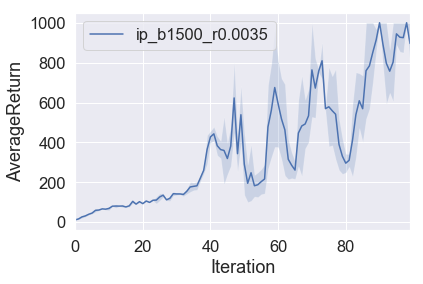

finished plot  ['plot.py', 'data/ip_b1500_r0.0035_InvertedPendulum-v2_01-09-2019_18-57-23', '--value', 'AverageReturn']  at 2019-09-01 20:21:57.865444
starts plot  ['plot.py', 'data/ip_b1500_r0.003_InvertedPendulum-v2_01-09-2019_19-00-32', '--value', 'AverageReturn']  at 2019-09-01 20:21:57.865444


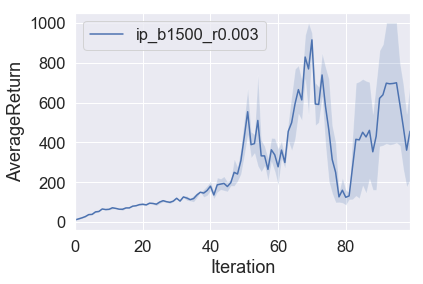

finished plot  ['plot.py', 'data/ip_b1500_r0.003_InvertedPendulum-v2_01-09-2019_19-00-32', '--value', 'AverageReturn']  at 2019-09-01 20:21:58.141706
starts plot  ['plot.py', 'data/ip_b1500_r0.0045_InvertedPendulum-v2_01-09-2019_18-50-16', '--value', 'AverageReturn']  at 2019-09-01 20:21:58.141706


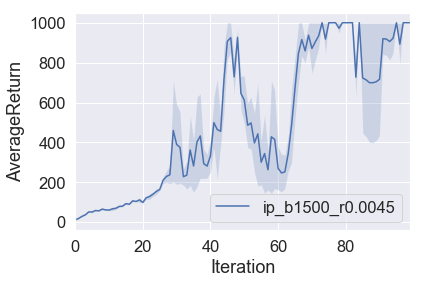

finished plot  ['plot.py', 'data/ip_b1500_r0.0045_InvertedPendulum-v2_01-09-2019_18-50-16', '--value', 'AverageReturn']  at 2019-09-01 20:21:58.509722
starts plot  ['plot.py', 'data/ip_b1500_r0.004_InvertedPendulum-v2_01-09-2019_18-54-02', '--value', 'AverageReturn']  at 2019-09-01 20:21:58.509722


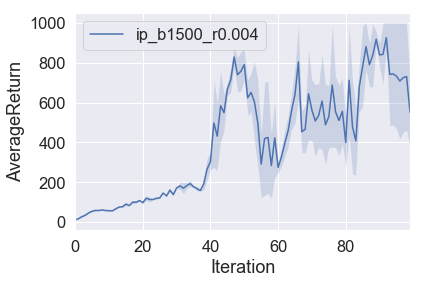

finished plot  ['plot.py', 'data/ip_b1500_r0.004_InvertedPendulum-v2_01-09-2019_18-54-02', '--value', 'AverageReturn']  at 2019-09-01 20:21:58.774016
starts plot  ['plot.py', 'data/ip_b1500_r0.005_InvertedPendulum-v2_01-09-2019_18-46-18', '--value', 'AverageReturn']  at 2019-09-01 20:21:58.775013


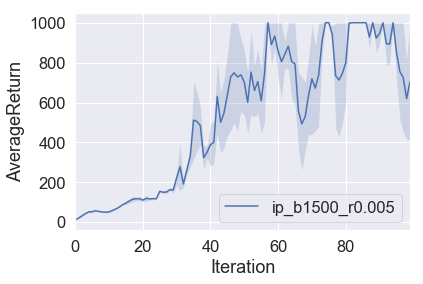

finished plot  ['plot.py', 'data/ip_b1500_r0.005_InvertedPendulum-v2_01-09-2019_18-46-18', '--value', 'AverageReturn']  at 2019-09-01 20:21:59.048282
starts plot  ['plot.py', 'data/ip_b2000_r0.0035_InvertedPendulum-v2_01-09-2019_19-19-18', '--value', 'AverageReturn']  at 2019-09-01 20:21:59.048282


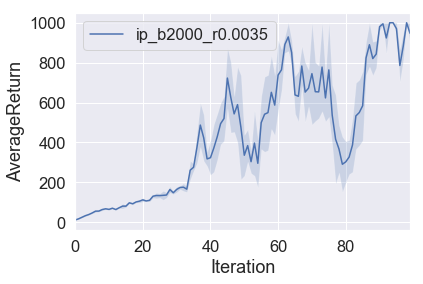

finished plot  ['plot.py', 'data/ip_b2000_r0.0035_InvertedPendulum-v2_01-09-2019_19-19-18', '--value', 'AverageReturn']  at 2019-09-01 20:21:59.329530
starts plot  ['plot.py', 'data/ip_b2000_r0.003_InvertedPendulum-v2_01-09-2019_19-23-53', '--value', 'AverageReturn']  at 2019-09-01 20:21:59.329530


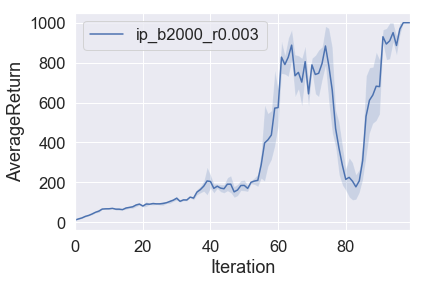

finished plot  ['plot.py', 'data/ip_b2000_r0.003_InvertedPendulum-v2_01-09-2019_19-23-53', '--value', 'AverageReturn']  at 2019-09-01 20:21:59.610779
starts plot  ['plot.py', 'data/ip_b2000_r0.0045_InvertedPendulum-v2_01-09-2019_19-08-57', '--value', 'AverageReturn']  at 2019-09-01 20:21:59.610779


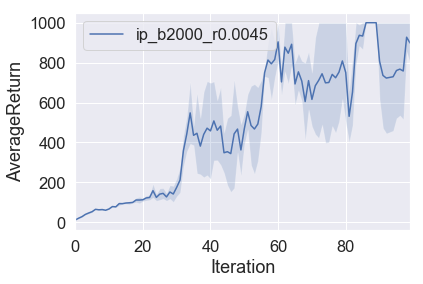

finished plot  ['plot.py', 'data/ip_b2000_r0.0045_InvertedPendulum-v2_01-09-2019_19-08-57', '--value', 'AverageReturn']  at 2019-09-01 20:21:59.892028
starts plot  ['plot.py', 'data/ip_b2000_r0.004_InvertedPendulum-v2_01-09-2019_19-14-19', '--value', 'AverageReturn']  at 2019-09-01 20:21:59.892028


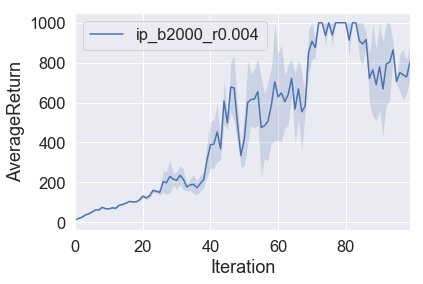

finished plot  ['plot.py', 'data/ip_b2000_r0.004_InvertedPendulum-v2_01-09-2019_19-14-19', '--value', 'AverageReturn']  at 2019-09-01 20:22:00.177265
starts plot  ['plot.py', 'data/ip_b2000_r0.005_InvertedPendulum-v2_01-09-2019_19-03-31', '--value', 'AverageReturn']  at 2019-09-01 20:22:00.177265


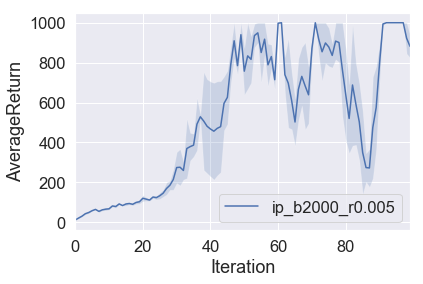

finished plot  ['plot.py', 'data/ip_b2000_r0.005_InvertedPendulum-v2_01-09-2019_19-03-31', '--value', 'AverageReturn']  at 2019-09-01 20:22:00.448539
starts plot  ['plot.py', 'data/ip_b2500_r0.0035_InvertedPendulum-v2_01-09-2019_19-43-27', '--value', 'AverageReturn']  at 2019-09-01 20:22:00.448539


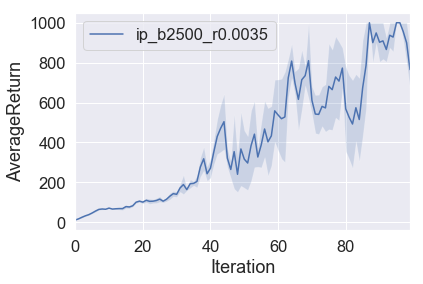

finished plot  ['plot.py', 'data/ip_b2500_r0.0035_InvertedPendulum-v2_01-09-2019_19-43-27', '--value', 'AverageReturn']  at 2019-09-01 20:22:00.716823
starts plot  ['plot.py', 'data/ip_b2500_r0.003_InvertedPendulum-v2_01-09-2019_19-48-07', '--value', 'AverageReturn']  at 2019-09-01 20:22:00.716823


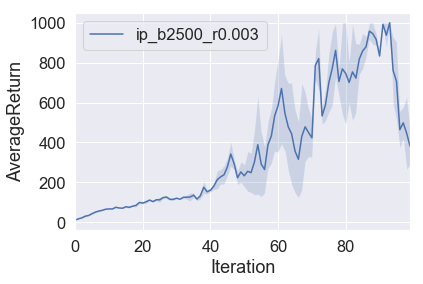

finished plot  ['plot.py', 'data/ip_b2500_r0.003_InvertedPendulum-v2_01-09-2019_19-48-07', '--value', 'AverageReturn']  at 2019-09-01 20:22:00.983110
starts plot  ['plot.py', 'data/ip_b2500_r0.0045_InvertedPendulum-v2_01-09-2019_19-33-08', '--value', 'AverageReturn']  at 2019-09-01 20:22:00.983110


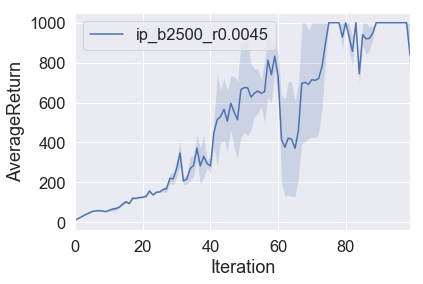

finished plot  ['plot.py', 'data/ip_b2500_r0.0045_InvertedPendulum-v2_01-09-2019_19-33-08', '--value', 'AverageReturn']  at 2019-09-01 20:22:01.260368
starts plot  ['plot.py', 'data/ip_b2500_r0.004_InvertedPendulum-v2_01-09-2019_19-38-19', '--value', 'AverageReturn']  at 2019-09-01 20:22:01.260368


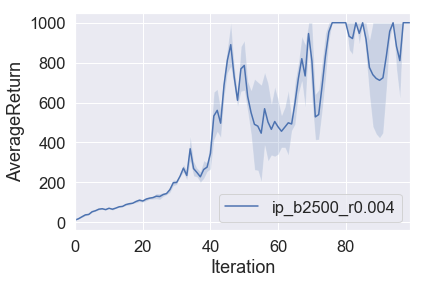

finished plot  ['plot.py', 'data/ip_b2500_r0.004_InvertedPendulum-v2_01-09-2019_19-38-19', '--value', 'AverageReturn']  at 2019-09-01 20:22:01.531645
starts plot  ['plot.py', 'data/ip_b2500_r0.005_InvertedPendulum-v2_01-09-2019_19-27-57', '--value', 'AverageReturn']  at 2019-09-01 20:22:01.531645


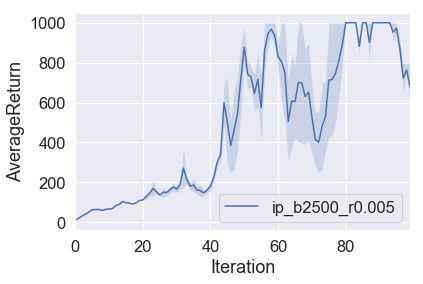

finished plot  ['plot.py', 'data/ip_b2500_r0.005_InvertedPendulum-v2_01-09-2019_19-27-57', '--value', 'AverageReturn']  at 2019-09-01 20:22:01.797932
starts plot  ['plot.py', 'data/ip_b3000_r0.0035_InvertedPendulum-v2_01-09-2019_20-10-29', '--value', 'AverageReturn']  at 2019-09-01 20:22:01.797932


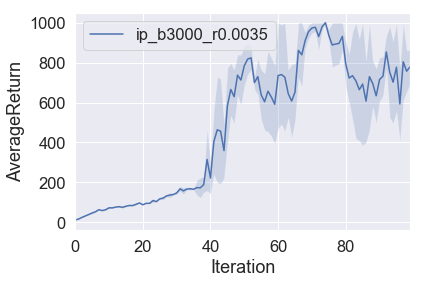

finished plot  ['plot.py', 'data/ip_b3000_r0.0035_InvertedPendulum-v2_01-09-2019_20-10-29', '--value', 'AverageReturn']  at 2019-09-01 20:22:02.073197
starts plot  ['plot.py', 'data/ip_b3000_r0.003_InvertedPendulum-v2_01-09-2019_20-16-43', '--value', 'AverageReturn']  at 2019-09-01 20:22:02.073197


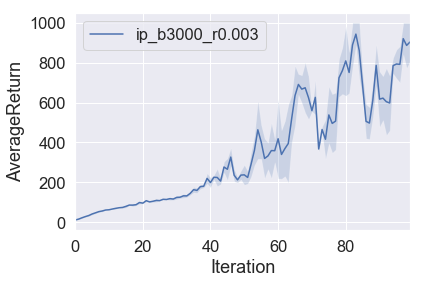

finished plot  ['plot.py', 'data/ip_b3000_r0.003_InvertedPendulum-v2_01-09-2019_20-16-43', '--value', 'AverageReturn']  at 2019-09-01 20:22:02.352450
starts plot  ['plot.py', 'data/ip_b3000_r0.0045_InvertedPendulum-v2_01-09-2019_19-58-31', '--value', 'AverageReturn']  at 2019-09-01 20:22:02.352450


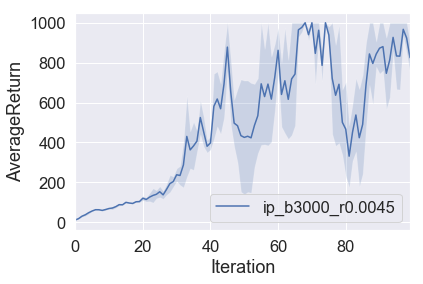

finished plot  ['plot.py', 'data/ip_b3000_r0.0045_InvertedPendulum-v2_01-09-2019_19-58-31', '--value', 'AverageReturn']  at 2019-09-01 20:22:02.623725
starts plot  ['plot.py', 'data/ip_b3000_r0.004_InvertedPendulum-v2_01-09-2019_20-04-32', '--value', 'AverageReturn']  at 2019-09-01 20:22:02.623725


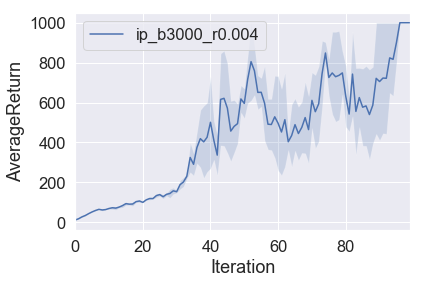

finished plot  ['plot.py', 'data/ip_b3000_r0.004_InvertedPendulum-v2_01-09-2019_20-04-32', '--value', 'AverageReturn']  at 2019-09-01 20:22:02.896994
starts plot  ['plot.py', 'data/ip_b3000_r0.005_InvertedPendulum-v2_01-09-2019_19-52-19', '--value', 'AverageReturn']  at 2019-09-01 20:22:02.896994


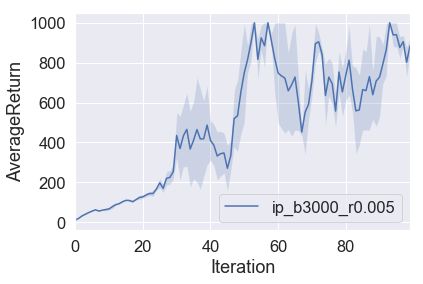

finished plot  ['plot.py', 'data/ip_b3000_r0.005_InvertedPendulum-v2_01-09-2019_19-52-19', '--value', 'AverageReturn']  at 2019-09-01 20:22:03.170264
finished plot on all command list at 2019-09-01 20:22:03.170264


In [10]:
import plot
%matplotlib inline  

for ip_path in ip_path_list :
    sys.argv = [ 'plot.py', ip_path, '--value', 'AverageReturn' ]
    print('starts plot ', sys.argv, ' at', dt.datetime.now())
    try :
        plot.main()
    except ValueError as e :
        print('error - ', e)
    print('finished plot ', sys.argv, ' at', dt.datetime.now())
    
print('finished plot on all command list at', dt.datetime.now())

starts train  ['train_pg_f18.py', 'InvertedPendulum-v2', '-ep', '1000', '--discount', '0.9', '-n', '100', '-e', '3', '-l', '2', '-s', '64', '-b', '3000', '-lr', '0.0033', '-rtg', '--exp_name', 'ip_b3000_r0.0033']  at 2019-09-02 09:47:17.957348
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_pg_f18.py', 'InvertedPendulum-v2', '-ep', '1000', '--discount', '0.9', '-n', '100', '-e', '3', '-l', '2', '-s', '64', '-b', '3000', '-lr', '0.0033', '-rtg', '--exp_name', 'ip_b3000_r0.0033']  at 2019-09-02 09:52:05.279171
['data/ip_b3000_r0.0033_InvertedPendulum-v2_02-09-2019_09-47-17']
starts plot  ['plot.py', 'data/ip_b3000_r0.0033_InvertedPendulum-v2_02-09-2019_09-47-17', '--value', 'AverageReturn']  at 2019-09-02 09:52:05.285155


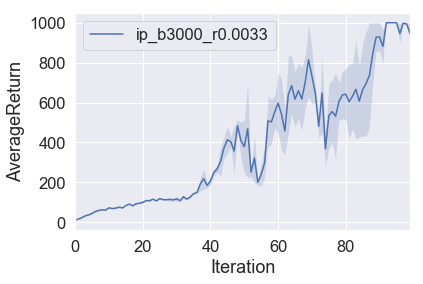

finished plot  ['plot.py', 'data/ip_b3000_r0.0033_InvertedPendulum-v2_02-09-2019_09-47-17', '--value', 'AverageReturn']  at 2019-09-02 09:52:05.572387
finished plot on all command list at 2019-09-02 09:52:05.573384


In [30]:
command = 'python train_pg_f18.py InvertedPendulum-v2 -ep 1000 --discount 0.9 -n 100 -e 3 -l 2 -s 64 -b {0} -lr {1} -rtg --exp_name ip_b{0}_r{1}'

b = 3000
lr = 0.0033

formatted = command.format(b, round(lr, 4))
sys.argv = formatted.split()[1:]
print('starts train ', sys.argv, ' at', dt.datetime.now())
pg.main()
print('finished train ', sys.argv, ' at', dt.datetime.now())

import plot
%matplotlib inline  

ip_path_prefix = 'ip_b{0}_r{1}'.format(b, round(lr, 4))

data_dir = os.path.join('.', 'data')

ip_path_list = [] 

if os.path.isdir(data_dir) :
    for f in os.listdir(data_dir) :
        if f.startswith(ip_path_prefix) :
            ip_path_list.append('data/' + f)

print(ip_path_list)

import plot
%matplotlib inline  

for ip_path in ip_path_list :
    sys.argv = [ 'plot.py', ip_path, '--value', 'AverageReturn' ]
    print('starts plot ', sys.argv, ' at', dt.datetime.now())
    try :
        plot.main()
    except ValueError as e :
        print('error - ', e)
    print('finished plot ', sys.argv, ' at', dt.datetime.now())
    
print('finished plot on all command list at', dt.datetime.now())

## Problem 7 LunarLander

starts train  ['train_pg_f18.py', 'LunarLanderContinuous-v2', '-ep', '1000', '--discount', '0.99', '-n', '100', '-e', '3', '-l', '2', '-s', '64', '-b', '40000', '-lr', '0.005', '-rtg', '--nn_baseline', '--exp_name', 'll_b40000_r0.005']  at 2019-09-01 20:27:41.203729
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_pg_f18.py', 'LunarLanderContinuous-v2', '-ep', '1000', '--discount', '0.99', '-n', '100', '-e', '3', '-l', '2', '-s', '64', '-b', '40000', '-lr', '0.005', '-rtg', '--nn_baseline', '--exp_name', 'll_b40000_r0.005']  at 2019-09-01 21:44:21.500132
['data/ll_b40000_r0.005_LunarLanderContinuous-v2_01-09-2019_20-27-41']
starts plot  ['plot.py', 'data/ll_b40000_r0.005_LunarLanderContinuous-v2_01-09-2019_20-27-41', '--value', 'AverageReturn']  at 2019-09-01 21:44:21.503125


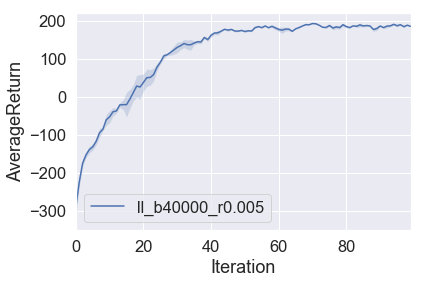

finished plot  ['plot.py', 'data/ll_b40000_r0.005_LunarLanderContinuous-v2_01-09-2019_20-27-41', '--value', 'AverageReturn']  at 2019-09-01 21:44:21.772404
finished plot on all command list at 2019-09-01 21:44:21.772404


In [13]:
# sudo pip install box2d-py

command = 'python train_pg_f18.py LunarLanderContinuous-v2 -ep 1000 --discount 0.99 -n 100 -e 3 -l 2 -s 64 -b 40000 -lr 0.005 -rtg --nn_baseline --exp_name ll_b40000_r0.005'

sys.argv = command.split()[1:]
print('starts train ', sys.argv, ' at', dt.datetime.now())
pg.main()
print('finished train ', sys.argv, ' at', dt.datetime.now())

import plot
%matplotlib inline  

ll_path_prefix = 'll_b40000_r0.005'

data_dir = os.path.join('.', 'data')

ll_path_list = [] 

if os.path.isdir(data_dir) :
    for f in os.listdir(data_dir) :
        if f.startswith(ll_path_prefix) :
            ll_path_list.append('data/' + f)

print(ll_path_list)

import plot
%matplotlib inline  

for ll_path in ll_path_list :
    sys.argv = [ 'plot.py', ll_path, '--value', 'AverageReturn' ]
    print('starts plot ', sys.argv, ' at', dt.datetime.now())
    try :
        plot.main()
    except (ValueError, IndexError) as e :
        print('error - ', e)
    print('finished plot ', sys.argv, ' at', dt.datetime.now())
    
print('finished plot on all command list at', dt.datetime.now())

## the effect of batch size and learning rate

* batch size : larger batch size tends to reduce fluctutation and converge faster
* learning rate : too small learning rate slowly converges and too large learning rate converges faster but oscillates a lot

## Problem 8 HalfCheetah

In [14]:
# PROBLEM 8

command = 'python train_pg_f18.py HalfCheetah-v2 -ep 150 --discount 0.9 -n 100 -e 3 -l 2 -s 32 -b {0} -lr {1} -rtg --nn_baseline --exp_name hcbl_b{0}_r{1}'
command_list = []

b_list = [10000, 30000, 50000]
lr_list = [0.005, 0.01, 0.02]

for b in b_list :
    for lr in lr_list :
        command_list.append(command.format(b, round(lr, 4)))

#for cmd in command_list :
#    print(cmd)

In [15]:
for command in command_list :
    sys.argv = command.split()[1:]
    print('starts train ', sys.argv, ' at', dt.datetime.now())
    pg.main()
    print('finished train ', sys.argv, ' at', dt.datetime.now())

print('finished train on all command list at', dt.datetime.now())

starts train  ['train_pg_f18.py', 'HalfCheetah-v2', '-ep', '150', '--discount', '0.9', '-n', '100', '-e', '3', '-l', '2', '-s', '32', '-b', '10000', '-lr', '0.005', '-rtg', '--nn_baseline', '--exp_name', 'hcbl_b10000_r0.005']  at 2019-09-01 21:44:21.804319
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_pg_f18.py', 'HalfCheetah-v2', '-ep', '150', '--discount', '0.9', '-n', '100', '-e', '3', '-l', '2', '-s', '32', '-b', '10000', '-lr', '0.005', '-rtg', '--nn_baseline', '--exp_name', 'hcbl_b10000_r0.005']  at 2019-09-01 21:54:54.817127
starts train  ['train_pg_f18.py', 'HalfCheetah-v2', '-ep', '150', '--discount', '0.9', '-n', '100', '-e', '3', '-l', '2', '-s', '32', '-b', '10000', '-lr', '0.01', '-rtg', '--nn_baseline', '--exp_name', 'hcbl_b10000_r0.01']  at 2019-09-01 21:54:54.818125
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_pg_f18.py', 'Ha

In [16]:
data_dir = os.path.join('.', 'data')

hcbl_path_list = [] 

if os.path.isdir(data_dir) :
    for f in os.listdir(data_dir) :
        if f.startswith('hcbl_') :
            hcbl_path_list.append('data/' + f)

print(hcbl_path_list)

['data/hcbl_b10000_r0.005_HalfCheetah-v2_01-09-2019_21-44-21', 'data/hcbl_b10000_r0.01_HalfCheetah-v2_01-09-2019_21-54-54', 'data/hcbl_b10000_r0.02_HalfCheetah-v2_01-09-2019_22-05-29', 'data/hcbl_b30000_r0.005_HalfCheetah-v2_01-09-2019_22-16-09', 'data/hcbl_b30000_r0.01_HalfCheetah-v2_01-09-2019_22-46-27', 'data/hcbl_b30000_r0.02_HalfCheetah-v2_01-09-2019_23-17-06', 'data/hcbl_b50000_r0.005_HalfCheetah-v2_01-09-2019_23-49-44', 'data/hcbl_b50000_r0.01_HalfCheetah-v2_02-09-2019_00-40-32', 'data/hcbl_b50000_r0.02_HalfCheetah-v2_02-09-2019_01-32-13']


starts plot  ['plot.py', 'data/hcbl_b10000_r0.005_HalfCheetah-v2_01-09-2019_21-44-21', '--value', 'AverageReturn']  at 2019-09-02 02:23:56.396069


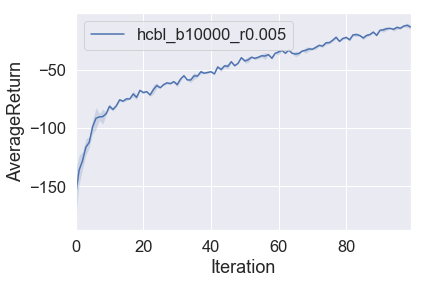

finished plot  ['plot.py', 'data/hcbl_b10000_r0.005_HalfCheetah-v2_01-09-2019_21-44-21', '--value', 'AverageReturn']  at 2019-09-02 02:23:56.678316
starts plot  ['plot.py', 'data/hcbl_b10000_r0.01_HalfCheetah-v2_01-09-2019_21-54-54', '--value', 'AverageReturn']  at 2019-09-02 02:23:56.678316


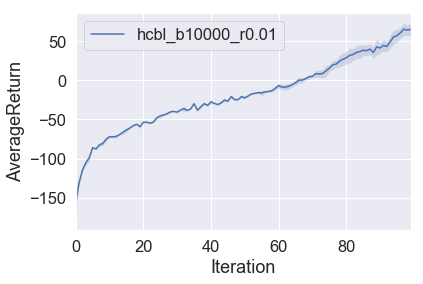

finished plot  ['plot.py', 'data/hcbl_b10000_r0.01_HalfCheetah-v2_01-09-2019_21-54-54', '--value', 'AverageReturn']  at 2019-09-02 02:23:56.933632
starts plot  ['plot.py', 'data/hcbl_b10000_r0.02_HalfCheetah-v2_01-09-2019_22-05-29', '--value', 'AverageReturn']  at 2019-09-02 02:23:56.933632


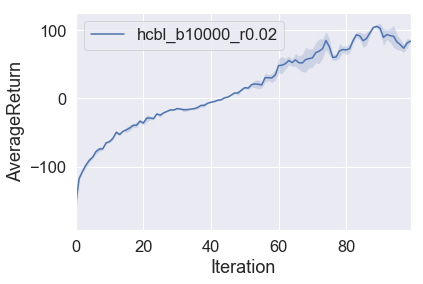

finished plot  ['plot.py', 'data/hcbl_b10000_r0.02_HalfCheetah-v2_01-09-2019_22-05-29', '--value', 'AverageReturn']  at 2019-09-02 02:23:57.300651
starts plot  ['plot.py', 'data/hcbl_b30000_r0.005_HalfCheetah-v2_01-09-2019_22-16-09', '--value', 'AverageReturn']  at 2019-09-02 02:23:57.300651


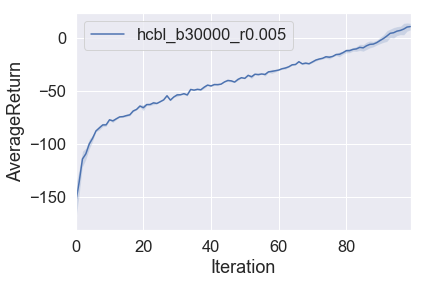

finished plot  ['plot.py', 'data/hcbl_b30000_r0.005_HalfCheetah-v2_01-09-2019_22-16-09', '--value', 'AverageReturn']  at 2019-09-02 02:23:57.567936
starts plot  ['plot.py', 'data/hcbl_b30000_r0.01_HalfCheetah-v2_01-09-2019_22-46-27', '--value', 'AverageReturn']  at 2019-09-02 02:23:57.567936


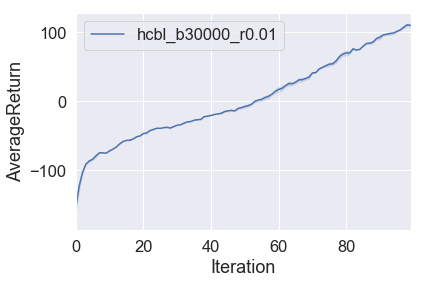

finished plot  ['plot.py', 'data/hcbl_b30000_r0.01_HalfCheetah-v2_01-09-2019_22-46-27', '--value', 'AverageReturn']  at 2019-09-02 02:23:57.832230
starts plot  ['plot.py', 'data/hcbl_b30000_r0.02_HalfCheetah-v2_01-09-2019_23-17-06', '--value', 'AverageReturn']  at 2019-09-02 02:23:57.832230


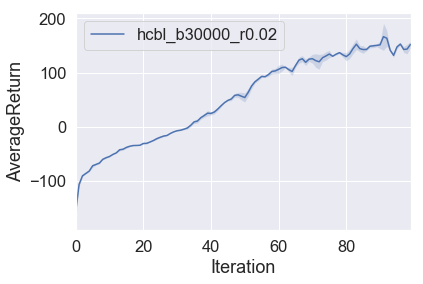

finished plot  ['plot.py', 'data/hcbl_b30000_r0.02_HalfCheetah-v2_01-09-2019_23-17-06', '--value', 'AverageReturn']  at 2019-09-02 02:23:58.100512
starts plot  ['plot.py', 'data/hcbl_b50000_r0.005_HalfCheetah-v2_01-09-2019_23-49-44', '--value', 'AverageReturn']  at 2019-09-02 02:23:58.100512


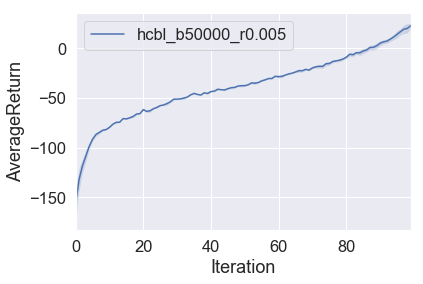

finished plot  ['plot.py', 'data/hcbl_b50000_r0.005_HalfCheetah-v2_01-09-2019_23-49-44', '--value', 'AverageReturn']  at 2019-09-02 02:23:58.359820
starts plot  ['plot.py', 'data/hcbl_b50000_r0.01_HalfCheetah-v2_02-09-2019_00-40-32', '--value', 'AverageReturn']  at 2019-09-02 02:23:58.359820


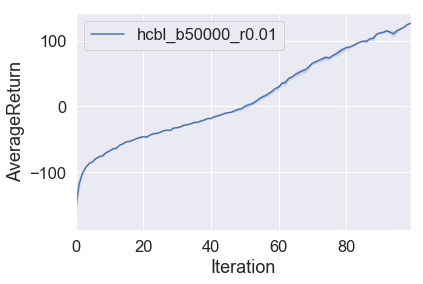

finished plot  ['plot.py', 'data/hcbl_b50000_r0.01_HalfCheetah-v2_02-09-2019_00-40-32', '--value', 'AverageReturn']  at 2019-09-02 02:23:58.615137
starts plot  ['plot.py', 'data/hcbl_b50000_r0.02_HalfCheetah-v2_02-09-2019_01-32-13', '--value', 'AverageReturn']  at 2019-09-02 02:23:58.615137


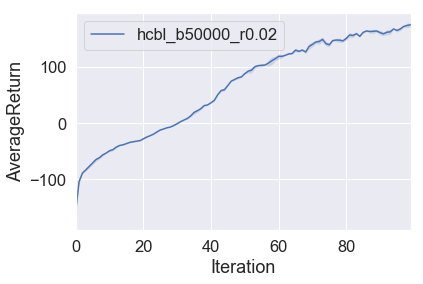

finished plot  ['plot.py', 'data/hcbl_b50000_r0.02_HalfCheetah-v2_02-09-2019_01-32-13', '--value', 'AverageReturn']  at 2019-09-02 02:23:58.872449
finished plot on all command list at 2019-09-02 02:23:58.872449


In [17]:
import plot
%matplotlib inline  

for hcbl_path in hcbl_path_list :
    sys.argv = [ 'plot.py', hcbl_path, '--value', 'AverageReturn' ]
    print('starts plot ', sys.argv, ' at', dt.datetime.now())
    try :
        plot.main()
    except ValueError as e :
        print('error - ', e)
    print('finished plot ', sys.argv, ' at', dt.datetime.now())
    
print('finished plot on all command list at', dt.datetime.now())

In [18]:

command_list = [
    'python train_pg_f18.py HalfCheetah-v2 -ep 150 --discount 0.95 -n 100 -e 3 -l 2 -s 32 -b {0} -lr {1} --exp_name hcbr_b{0}_r{1}',
    'python train_pg_f18.py HalfCheetah-v2 -ep 150 --discount 0.95 -n 100 -e 3 -l 2 -s 32 -b {0} -lr {1} -rtg --exp_name hcbr_rtg_b{0}_r{1}',
    'python train_pg_f18.py HalfCheetah-v2 -ep 150 --discount 0.95 -n 100 -e 3 -l 2 -s 32 -b {0} -lr {1} --nn_baseline --exp_name hcbr_bl_b{0}_r{1}',
    'python train_pg_f18.py HalfCheetah-v2 -ep 150 --discount 0.95 -n 100 -e 3  -l 2 -s 32 -b {0} -lr {1} -rtg --nn_baseline --exp_name hcbr_rtg_bl_b{0}_r{1}',
]

b = 30000
lr = 0.02

for command in command_list :
    formatted = command.format(b, round(lr, 4))
    sys.argv = formatted.split()[1:]
    print('starts train ', sys.argv, ' at', dt.datetime.now())
    pg.main()
    print('finished train ', sys.argv, ' at', dt.datetime.now())

print('finished train on all command list at', dt.datetime.now())


starts train  ['train_pg_f18.py', 'HalfCheetah-v2', '-ep', '150', '--discount', '0.95', '-n', '100', '-e', '3', '-l', '2', '-s', '32', '-b', '30000', '-lr', '0.02', '--exp_name', 'hcbr_b30000_r0.02']  at 2019-09-02 02:23:58.879431
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_pg_f18.py', 'HalfCheetah-v2', '-ep', '150', '--discount', '0.95', '-n', '100', '-e', '3', '-l', '2', '-s', '32', '-b', '30000', '-lr', '0.02', '--exp_name', 'hcbr_b30000_r0.02']  at 2019-09-02 02:44:37.287727
starts train  ['train_pg_f18.py', 'HalfCheetah-v2', '-ep', '150', '--discount', '0.95', '-n', '100', '-e', '3', '-l', '2', '-s', '32', '-b', '30000', '-lr', '0.02', '-rtg', '--exp_name', 'hcbr_rtg_b30000_r0.02']  at 2019-09-02 02:44:37.287727
Running experiment with seed 1
Running experiment with seed 11
Running experiment with seed 21
finished train  ['train_pg_f18.py', 'HalfCheetah-v2', '-ep', '150', '--discount', '0.95', '-n', '100', 

['data/hcbr_b30000_r0.02_HalfCheetah-v2_02-09-2019_02-23-58', 'data/hcbr_bl_b30000_r0.02_HalfCheetah-v2_02-09-2019_03-16-24', 'data/hcbr_rtg_b30000_r0.02_HalfCheetah-v2_02-09-2019_02-44-37', 'data/hcbr_rtg_bl_b30000_r0.02_HalfCheetah-v2_02-09-2019_03-36-49']
starts plot  ['plot.py', 'data/hcbr_b30000_r0.02_HalfCheetah-v2_02-09-2019_02-23-58', '--value', 'AverageReturn']  at 2019-09-02 04:07:21.908262


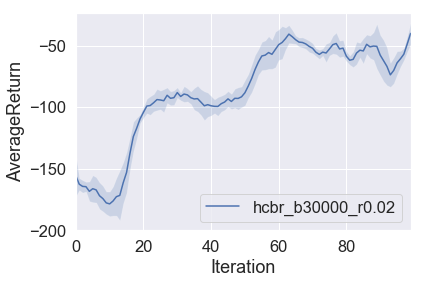

finished plot  ['plot.py', 'data/hcbr_b30000_r0.02_HalfCheetah-v2_02-09-2019_02-23-58', '--value', 'AverageReturn']  at 2019-09-02 04:07:22.183526
starts plot  ['plot.py', 'data/hcbr_bl_b30000_r0.02_HalfCheetah-v2_02-09-2019_03-16-24', '--value', 'AverageReturn']  at 2019-09-02 04:07:22.184524


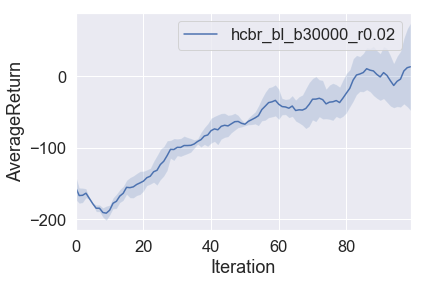

finished plot  ['plot.py', 'data/hcbr_bl_b30000_r0.02_HalfCheetah-v2_02-09-2019_03-16-24', '--value', 'AverageReturn']  at 2019-09-02 04:07:22.428870
starts plot  ['plot.py', 'data/hcbr_rtg_b30000_r0.02_HalfCheetah-v2_02-09-2019_02-44-37', '--value', 'AverageReturn']  at 2019-09-02 04:07:22.428870


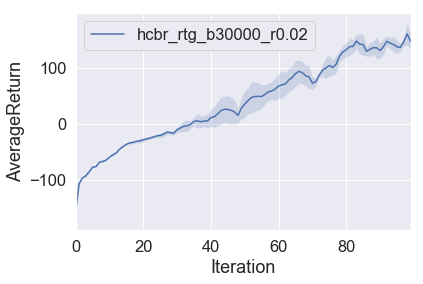

finished plot  ['plot.py', 'data/hcbr_rtg_b30000_r0.02_HalfCheetah-v2_02-09-2019_02-44-37', '--value', 'AverageReturn']  at 2019-09-02 04:07:22.698151
starts plot  ['plot.py', 'data/hcbr_rtg_bl_b30000_r0.02_HalfCheetah-v2_02-09-2019_03-36-49', '--value', 'AverageReturn']  at 2019-09-02 04:07:22.698151


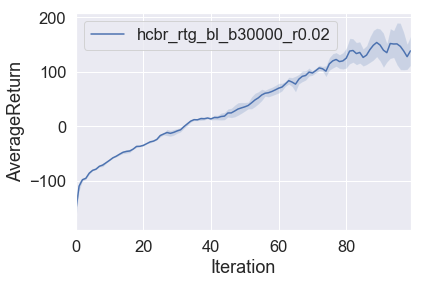

finished plot  ['plot.py', 'data/hcbr_rtg_bl_b30000_r0.02_HalfCheetah-v2_02-09-2019_03-36-49', '--value', 'AverageReturn']  at 2019-09-02 04:07:22.978401
finished plot on all command list at 2019-09-02 04:07:22.978401


In [19]:
data_dir = os.path.join('.', 'data')

hcbr_path_list = [] 

if os.path.isdir(data_dir) :
    for f in os.listdir(data_dir) :
        if f.startswith('hcbr_') :
            hcbr_path_list.append('data/' + f)

print(hcbr_path_list)

import plot
%matplotlib inline  

for hcbr_path in hcbr_path_list :
    sys.argv = [ 'plot.py', hcbr_path, '--value', 'AverageReturn' ]
    print('starts plot ', sys.argv, ' at', dt.datetime.now())
    try :
        plot.main()
    except ValueError as e :
        print('error - ', e)
    print('finished plot ', sys.argv, ' at', dt.datetime.now())
    
print('finished plot on all command list at', dt.datetime.now())

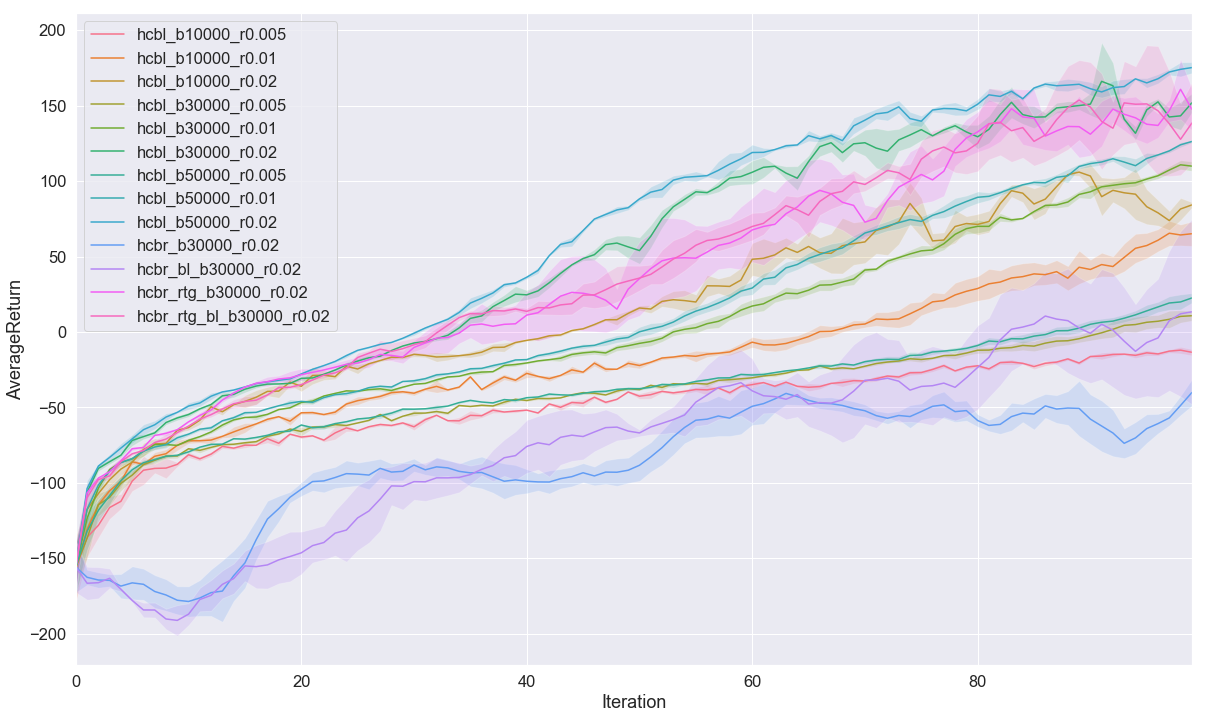

In [28]:
from matplotlib import pyplot as plt
import plot
%matplotlib inline

plt.figure(figsize=(20,12))
sys.argv = [ 'plot.py', 'data/halfcheetah/', '--value', 'AverageReturn' ]
plot.main()


In [20]:
import numpy as np

def sum_of_rewards(re_n, reward_to_go=True, decay_rate=0.9): # decay_rate <- self.gamma
    """
        Monte Carlo estimation of the Q function.

        let sum_of_path_lengths be the sum of the lengths of the paths sampled from 
            Agent.sample_trajectories
        let num_paths be the number of paths sampled from Agent.sample_trajectories

        arguments:
            re_n: length: num_paths. Each element in re_n is a numpy array 
                containing the rewards for the particular path

        returns:
            q_n: shape: (sum_of_path_lengths). A single vector for the estimated q values 
                whose length is the sum of the lengths of the paths

        ----------------------------------------------------------------------------------

        Your code should construct numpy arrays for Q-values which will be used to compute
        advantages (which will in turn be fed to the placeholder you defined in 
        Agent.define_placeholders). 

        Recall that the expression for the policy gradient PG is

              PG = E_{tau} [sum_{t=0}^T grad log pi(a_t|s_t) * (Q_t - b_t )]

        where 

              tau=(s_0, a_0, ...) is a trajectory,
              Q_t is the Q-value at time t, Q^{pi}(s_t, a_t),
              and b_t is a baseline which may depend on s_t. 

        You will write code for two cases, controlled by the flag 'reward_to_go':

          Case 1: trajectory-based PG 

              (reward_to_go = False)

              Instead of Q^{pi}(s_t, a_t), we use the total discounted reward summed over 
              entire trajectory (regardless of which time step the Q-value should be for). 

              For this case, the policy gradient estimator is

                  E_{tau} [sum_{t=0}^T grad log pi(a_t|s_t) * Ret(tau)]

              where

                  Ret(tau) = sum_{t'=0}^T gamma^t' r_{t'}.

              Thus, you should compute

                  Q_t = Ret(tau)

          Case 2: reward-to-go PG 

              (reward_to_go = True)

              Here, you estimate Q^{pi}(s_t, a_t) by the discounted sum of rewards starting
              from time step t. Thus, you should compute

                  Q_t = sum_{t'=t}^T gamma^(t'-t) * r_{t'}


        Store the Q-values for all timesteps and all trajectories in a variable 'q_n',
        like the 'ob_no' and 'ac_na' above. 
    """

    num_paths = len(re_n) # num_paths means number of trajectories
    q_n = []

    for re in re_n : 
        if reward_to_go:
            sub_q = np.empty(len(re))
            for t in range(len(re)) :
                sub_q[t] = 0.0
                gamma = 1.0

                for u in range(len(re) - t) :
                    sub_q[t] += gamma * re[t + u]
                    gamma *= decay_rate

            # for q_t in sub_q :
            #     q_n.append(q_t)
            q_n.extend(sub_q)
        else:
            gamma = 1.0
            total = 0.0
            for t in range(len(re)) :
                total += gamma * re[t]
                gamma *= decay_rate

            # for _ in range(len(re)) :
            #     q_n.append(total)
            q_n.extend(np.ones(shape=[len(re)]) * total)

    # print('sum of path lengths :', np.shape(q_n))
    return q_n


In [21]:
re_n = []
re_n.append([  -0.8349871 ,   -6.7412615 , -100.        ])
re_n.append([ 1.3620546e-01, -1.4724754e+00, 
       -1.0000000e+02])

gamma = 0.99

q_rtg = sum_of_rewards(re_n, reward_to_go=True, decay_rate=gamma)
q_nortg = sum_of_rewards(re_n, reward_to_go=False, decay_rate=gamma)

print('sum1:', q_rtg, ', length:', len(q_rtg))
print('sum2:', q_nortg, ', length:', len(q_nortg))

print('reward to go')
print(-0.8349871  + gamma * -6.7412615 + gamma*gamma*-100)
print(-6.7412615 + gamma*-100)
print(-100)
print('normal (all same in a trajectory)')
print(-0.8349871  + gamma * -6.7412615 + gamma*gamma*-100)


sum1: [-105.518835985, -105.74126150000001, -100.0, -99.33154518599999, -100.4724754, -100.0] , length: 6
sum2: [-105.518835985, -105.518835985, -105.518835985, -99.33154518599999, -99.33154518599999, -99.33154518599999] , length: 6
reward to go
-105.518835985
-105.74126150000001
-100
normal (all same in a trajectory)
-105.518835985
